In [147]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


# from sklearn.base import BaseEstimator, TransformerMixin
7

#!pip install --upgrade category_encoders 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder

# from sklearn.feature_selection import SelectFromModel


# from sklearn.model_selection import cross_val_score, KFold, train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.metrics import mean_absolute_error

# from catboost import CatBoostRegressor
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor

# import optuna


import tqdm
import joblib
import pickle
# # serializd your object and svaes its binary form 

# import shap


pd.set_option('display.max_columns', 70)
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False

style.use('ggplot')
sns.set_palette('Set2')
# # # blue, orange, green

# import warnings
# warnings.filterwarnings('ignore')


#### Read the dataset and initial analysis

In [148]:
# Read the dataset
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('x_test.csv')

In [149]:
# Make a copy of the datasets
df_test = test.copy()
df_train= train.copy()

In [150]:
#shape of the dataset
print(df_test.shape)
print(df_train.shape)

(9705, 63)
(75757, 64)


In [151]:
df_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [152]:
df_test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [153]:
#columns in dataset
print(df_train.columns)
print(df_test.columns)

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [154]:
# df_train.columns = df_train.columns.str.lower()
# df_train.head()


In [155]:
#renaming the cols to make all lower case to avoid confusions
df_train.rename(columns = {'Year_Factor':'year_factor','State_Factor':'state_factor','ELEVATION':'elevation'},inplace = True)
df_train.head()

df_test.rename(columns={'Year_Factor':'year_factor','State_Factor':'state_factor','ELEVATION':'elevation'},inplace = True)
df_test.head()

,year_factor,state_factor,building_class,facility_type,floor_area,year_built,energy_star_rating,elevation,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


# EDA

## Data dictionary to understand the features

**id**: building id

**year_factor** : anonymized year in which the weather and energy usage factors were observed

**state_factor** : anonymized state in which the building is located

**building_class** : building classification

**facility_type** : building usage type

**floor_area** : floor area (in square feet) of the building

**year_built** : year in which the building was constructed

**energy_star_rating** : the energy star rating of the building

**elevation** : elevation of the building location

**january_min_temp** : minimum temperature in January (in Fahrenheit) at the location of the building

**january_avg_temp** : average temperature in January (in Fahrenheit) at the location of the building

**january_max_temp** : maximum temperature in January (in Fahrenheit) at the location of the building

**cooling_degree_days** : cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**heating_degree_days** : heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**precipitation_inches** : annual precipitation in inches at the location of the building

**snowfall_inches** : annual snowfall in inches at the location of the building

**snowdepth_inches** : annual snow depth in inches at the location of the building

**avg_temp** : average temperature over a year at the location of the building

**days_below_30F** : total number of days below 30 degrees Fahrenheit at the location of the building

**days_below_20F** : total number of days below 20 degrees Fahrenheit at the location of the building

**days_below_10F** : total number of days below 10 degrees Fahrenheit at the location of the building

**days_below_0F** : total number of days below 0 degrees Fahrenheit at the location of the building

**days_above_80F** : total number of days above 80 degrees Fahrenheit at the location of the building

**days_above_90F** : total number of days above 90 degrees Fahrenheit at the location of the building

**days_above_100F** : total number of days above 100 degrees Fahrenheit at the location of the building

**days_above_110F** : total number of days above 110 degrees Fahrenheit at the location of the building

**direction_max_wind_speed** : wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**direction_peak_wind_speed** : wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**max_wind_speed** : maximum wind speed at the location of the building

**days_with_fog** : number of days with fog at the location of the building

### Target

**site_eui** : Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills


In [156]:
# check for the duplicates
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [157]:
#check for unique values in columns

# print(df_train.nunique())
# print(df_test.nunique())

print(df_train.select_dtypes(exclude='number').nunique())
print(df_test.select_dtypes(exclude='number').nunique())

print('================================================')

# Columns with same value
print([col for col in df_test if df_test[col].nunique()==1])
print([col for col in df_train if df_train[col].nunique()==1])

state_factor       7
building_class     2
facility_type     60
dtype: int64
state_factor       6
building_class     2
facility_type     60
dtype: int64
['year_factor', 'days_above_110F']
[]


In [158]:
#display value in the test data column having same value in all rows

df_test[['year_factor', 'days_above_110F']]

,year_factor,days_above_110F
0,7,0
1,7,0
2,7,0
3,7,0
4,7,0
...,...,...
9700,7,0
9701,7,0
9702,7,0
9703,7,0


In [159]:
# Missing value treatment defining a function
def Missing_value(df):
    
    #Calculate the missing values in each column
    Miss_val = df.isnull().sum()
    
    #Calculate the percentage of missing values
    Miss_val_percent = df.isnull().sum()/len(df)*100
    
    #Create a table of missing values and corresponding percntages
    Miss_val_table = pd.concat([Miss_val,Miss_val_percent],axis=1)
    
    #Rename the columns in the table
    Miss_val_tab = Miss_val_table.rename(columns={0:'Missing values',1:'Percentage missing values'})
    
    #Remove the rows with no missing values and sort by the percentage of missing values
    Miss_val_tab = Miss_val_tab[Miss_val_tab.iloc[:,1]!=0].sort_values('Percentage missing values',ascending=False).round(2)
   
    #Print a message
    print('The dataframe has'+ str(df.shape[1]) +' columns.\n There are ' + str(Miss_val_tab.shape[0])+' columns with missing values')
    
    return Miss_val_tab

In [160]:
#Display the missing values in the train dataset

print("The columns with missing values in train dataset are:")
print(list(df_train.columns[df_train.isnull().any()]))

print("=====================================================")

Miss_val_train = Missing_value(df_train)
Miss_val_train[:20]#.style.background_gradient(cmap='blue')

The columns with missing values in train dataset are:
['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
The dataframe has64 columns.
 There are 6 columns with missing values


,Missing values,Percentage missing values
days_with_fog,45796,60.45
direction_peak_wind_speed,41811,55.19
direction_max_wind_speed,41082,54.23
max_wind_speed,41082,54.23
energy_star_rating,26709,35.26
year_built,1837,2.42


In [161]:
#Display the missing values in the test dataset

print("The columns with missing values in test dataset are:")
print(list(df_test.columns[df_test.isnull().any()]))

print("=====================================================")

Miss_val_train = Missing_value(df_test)
Miss_val_train[:20]#.style.background_gradient(cmap='blue')

The columns with missing values in test dataset are:
['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
The dataframe has63 columns.
 There are 6 columns with missing values


,Missing values,Percentage missing values
days_with_fog,9117,93.94
direction_max_wind_speed,8575,88.36
direction_peak_wind_speed,8575,88.36
max_wind_speed,8575,88.36
energy_star_rating,2254,23.23
year_built,92,0.95


In [162]:
## Info

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                75757 non-null  int64  
 1   state_factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   elevation                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

### Observations:

**1.** The train dataset has 75757 rows and 64 columns, the target is continuous. Hence regression problem.

**2.** No duplicates in the dataset.(might be there in combined).

**3.** **year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'** are the columns with missing values.

**4.** The columns **'year_factor', 'days_above_110F'** in the test dataset have constant values.

## Visualizations

In [163]:
# Need to Combine the train and test datasets for visualization, hence adding siet_eui col with Nan to test data and adding identifier to both datasets.
import numpy as np
test['site_eui'] = np.nan
test['key'] = 'test'
train['key']='train'

In [164]:
test.head()
train.head()
print(train.shape)
print(test.shape)

(75757, 65)
(9705, 65)


In [165]:
#combined dataframe
df_comb = pd.concat([test,train],axis=0,ignore_index = True)

In [166]:
df_comb.shape
# df_comb.head()

(85462, 65)

In [167]:
df_comb.nunique()#.sum()#[df_comb.nunique().sum()!=0]
# df_comb.nunique()[df_comb.nunique()==0]

Year_Factor           7
State_Factor          7
building_class        2
facility_type        60
floor_area        20876
                  ...  
max_wind_speed       19
days_with_fog        47
id                85462
site_eui          61080
key                   2
Length: 65, dtype: int64

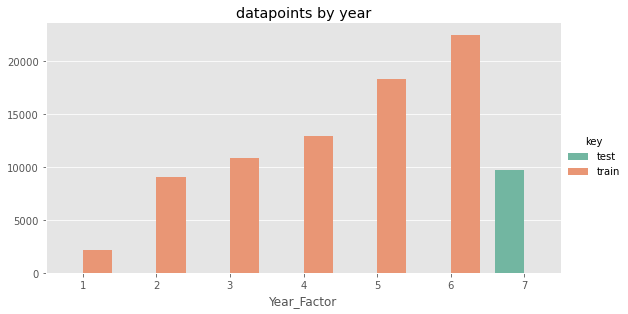

In [168]:
# Year Factor & id count


ax=sns.catplot(data=df_comb.groupby(['key','Year_Factor']).agg({'id':'count'}).reset_index()
            , x = 'Year_Factor',y='id',hue='key',kind='bar',aspect = 2, height = 4)\
.set(title='datapoints by year',ylabel = None)

Inference: 

1. Test data set has only year_factor 7.
2. Train data has year factor 1 to 6. The number of building counts for the year factors in decreasing order being- 6,5,4,3,2,1 

In [169]:
# df_comb[df_comb.iloc[:,0]==5]
    

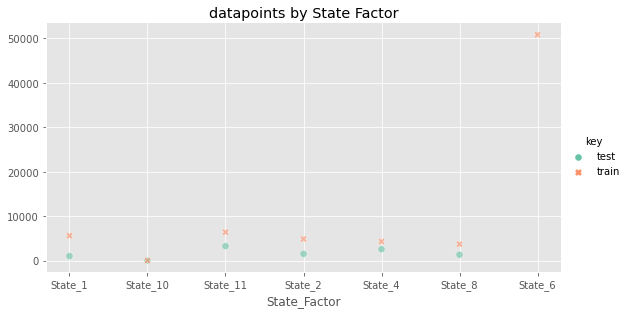

In [170]:
# State Factor & id count


ax=sns.relplot(data=df_comb.groupby(['key','State_Factor']).agg({'id':'count'}).reset_index()
            , x = 'State_Factor',y='id',hue='key',style = 'key',aspect=2,height = 4,s=50,alpha=.59)\
.set(title='datapoints by State Factor',ylabel = None)

Inference:

Test set has no records with state factor 6 & 10 and has most records with state 11 follwed by state 4.
    
Train set has most records with state 11 followed by 1 and 2.



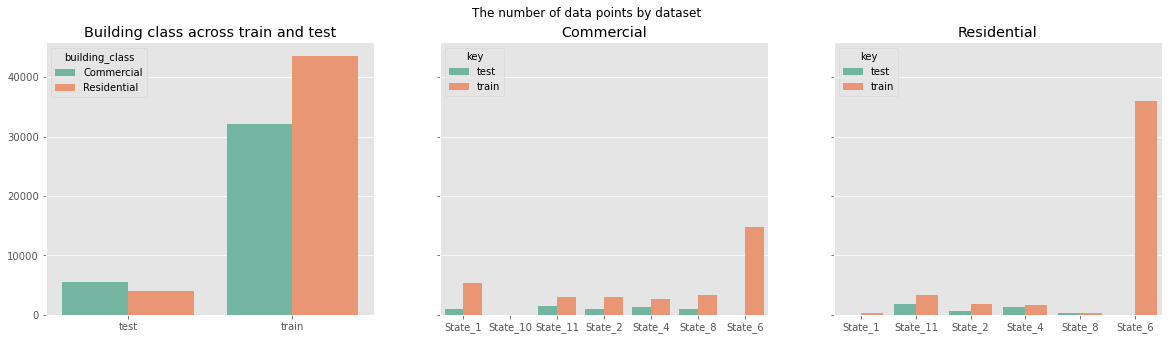

In [171]:
#Building class visualization

fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
fig.suptitle("The number of data points by dataset")

sns.barplot(x='key',
            y='id',
            data=df_comb.groupby(['key','building_class']).agg({'id':'count'}).reset_index(),
            hue='building_class',
            ax=ax[0],
            ci=False)
ax[0].set_title('Building class across train and test')
ax[0].set_ylabel("")
ax[0].set_xlabel("")

for e,s in enumerate(df_comb['building_class'].unique(),1):
    sns.barplot(x='State_Factor',
                y='id',
                data=df_comb[df_comb['building_class']==s].groupby(['key','State_Factor']).agg({'id':'count'}).reset_index(),
                hue='key',
                ax=ax[e],
                ci=False)
    ax[e].set_title(s)
    ax[e].set_ylabel("")
    ax[e].set_xlabel("")

Inference:

Test set has more Commercial buildings and train set has more residential buildings.

Commercial buildings: State 6 has max commercial buildings in train set and state 11 in train set

Residential buildings: State 6 has most residential buildings in train set and state 11 in train set



    

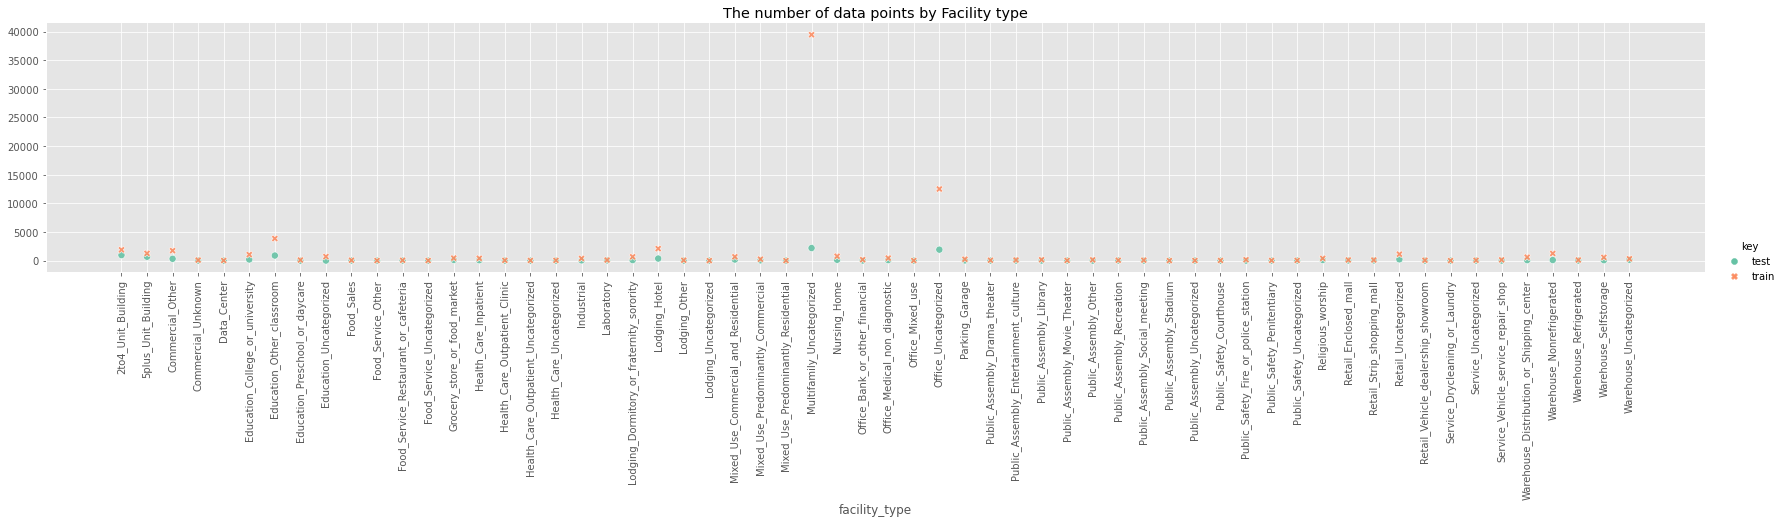

In [172]:
# Buildings vs facility type


# fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
# fig.suptitle("The number of data points by facility type")
ax=sns.relplot(x='facility_type',
            y='id',
            data=df_comb.groupby(['facility_type','key']).agg({'id':'count'}).reset_index(),
            hue='key',
            style = 'key',
            aspect = 6,
            height=4,
            s=50,
            alpha = .9)\
.set(title = "The number of data points by Facility type",
    ylabel=None)



ax.set_xticklabels(rotation=90)
None


Inference:

Multifamily uncategorised houses have most buildings in train set, followed by office uncategorized.

All facility types are present in both train and test sets.

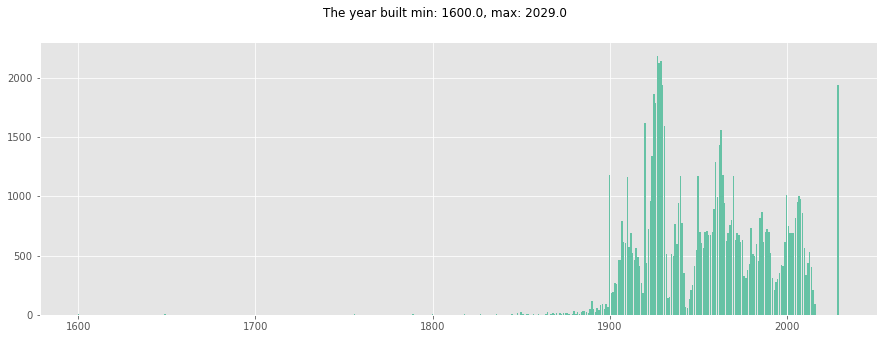

In [173]:
# Year built visualization

#temp = df_comb[['year_built']]#.fillna(2029).replace({0:2029}).astype('category').value_counts().reset_index().rename({0:'count'},axis=1)\
#           .sort_values('year_built')
temp=df_comb[['year_built']].fillna(2029).replace({0:2029}).value_counts().reset_index().rename(columns={0:'count'}).sort_values('year_built')
temp

fig, ax = plt.subplots(figsize=(15,5))

ax=plt.bar(temp['year_built'],
           temp['count']
          )
fig.suptitle(f"The year built min: {min(temp['year_built'])}, max: {max(temp['year_built'])}");


Inference:

The oldest building was constructed in 1600s and the newest in 2000s. Maximum building had a contruction year in 1900s.

There were buildings with 0 and null values. The last line (2029) represents those. This could be a wrong data entered as 0 cannot be construction year.

In [174]:
# sns.pairplot(df_comb,
#             vars=['energy_star_rating','floor_area','ELEVATION'], 
#             hue='key',
#             height=4,
#             plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},
#             corner=True
#            );

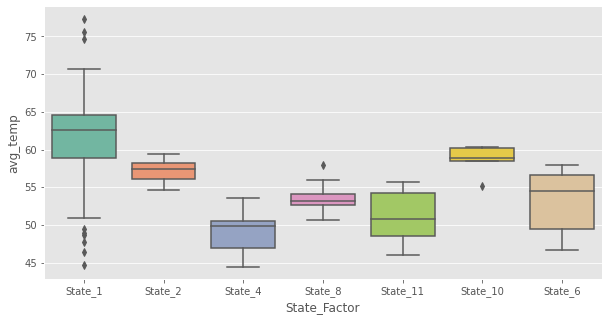

In [175]:
#Average temperature vs State factor.

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df_comb[['avg_temp','State_Factor']].drop_duplicates(), y='avg_temp', x='State_Factor');




Inference:

State_1 had higher avaerage temperature followed by state 10. Range of temperature was higher in Sate_1 and State_11.


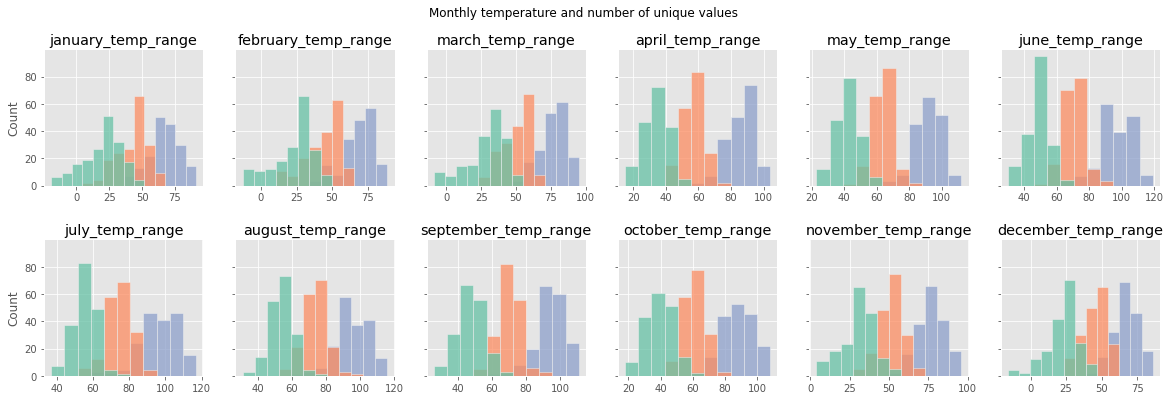

In [176]:
# Monthly temperature distribution plots

cols = [['january_min_temp', 'january_avg_temp', 'january_max_temp'],
        ['february_min_temp', 'february_avg_temp', 'february_max_temp'],
        ['march_min_temp', 'march_avg_temp', 'march_max_temp'], 
        ['april_min_temp','april_avg_temp', 'april_max_temp'], 
        ['may_min_temp', 'may_avg_temp','may_max_temp'], 
        ['june_min_temp', 'june_avg_temp', 'june_max_temp'],
        ['july_min_temp', 'july_avg_temp', 'july_max_temp'], 
        ['august_min_temp','august_avg_temp', 'august_max_temp'], 
        ['september_min_temp','september_avg_temp', 'september_max_temp'], 
        ['october_min_temp','october_avg_temp', 'october_max_temp'], 
        ['november_min_temp','november_avg_temp', 'november_max_temp'], 
        ['december_min_temp','december_avg_temp', 'december_max_temp']]
        
fig, ax = plt.subplots(2, 6, figsize=(20,6), sharey=True)
fig.suptitle("Monthly temperature and number of unique values")

for e, c in enumerate(cols):
    if e<=5:
        sns.histplot(df_comb[c].drop_duplicates(), ax=ax[0,e], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_temp_range')#'_#'+str(len(df_comb[c[0]].unique())))
    else:
        sns.histplot(df_comb[c].drop_duplicates(), ax=ax[1,e-6], legend=False)\
        .set(title=c[0][:c[0].find('_')]+ '_temp_range')#'_#'+str(len(df_comb[c[0]].unique())))
        
plt.subplots_adjust(hspace=0.4)

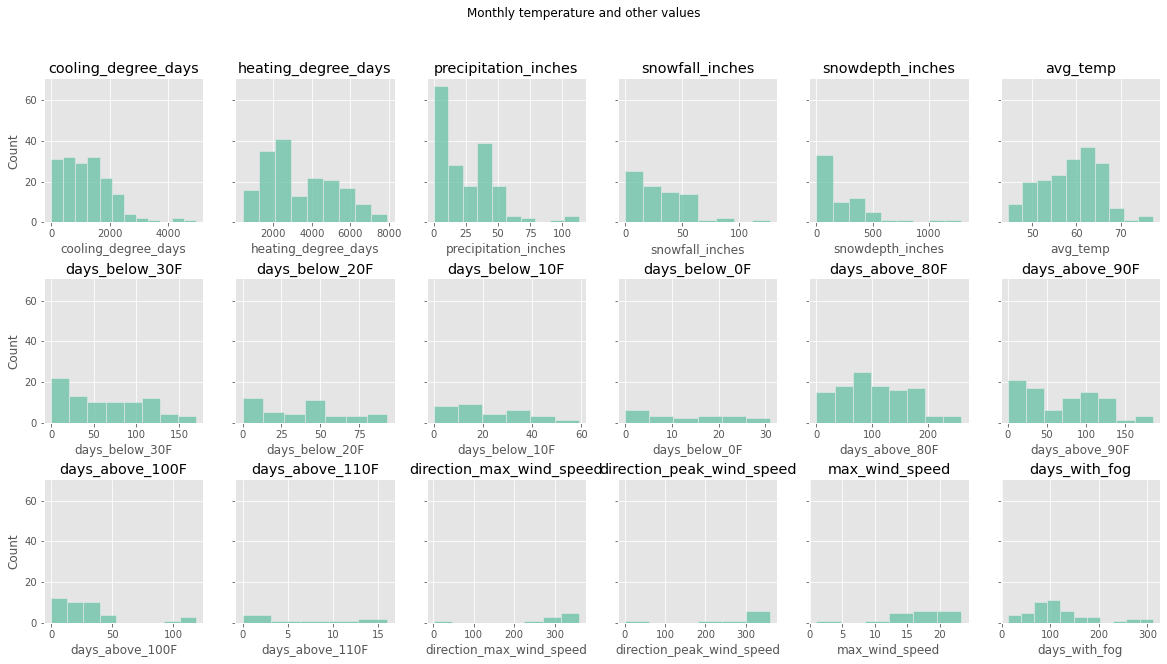

In [177]:
#Other visualizations

cols=['cooling_degree_days','heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

fig, ax = plt.subplots(3,6,figsize=(20,10),sharey = True)
fig.suptitle("Monthly temperature and other values")

for e,c in enumerate(cols):
    if e<=5:
        sns.histplot(data=df_comb[c].drop_duplicates(),ax=ax[0,e],legend=False)\
        .set(title=c)
    elif e<=11:
        sns.histplot(data=df_comb[c].drop_duplicates(),ax=ax[1,e-6],legend=False)\
        .set(title=c)
    else:
        sns.histplot(data=df_comb[c].drop_duplicates(),ax=ax[2,e-12],legend=False)\
        .set(title=c)
        
plt.subplots_adjust(hspace=0.4)


Inference:

Nothing specific to interpret. Each feature has a unique distribution.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


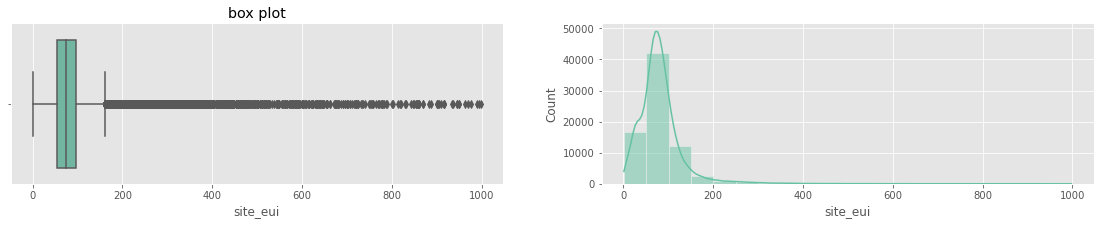

In [178]:
# Target variable distribution

fig = plt.figure(figsize=(30,10))

ax1 = plt.subplot(3,3,1)
ax1 = sns.boxplot(df_comb['site_eui'],palette='Set2')
plt.title('box plot')


ax2=plt.subplot(3,3,2)
ax2=sns.histplot(df_comb, x="site_eui", bins = 20,  kde = 'True')


# The below plots show the spread of data. 


[Text(0.5, 1.0, 'EUI by State'), Text(0, 0.5, '')]

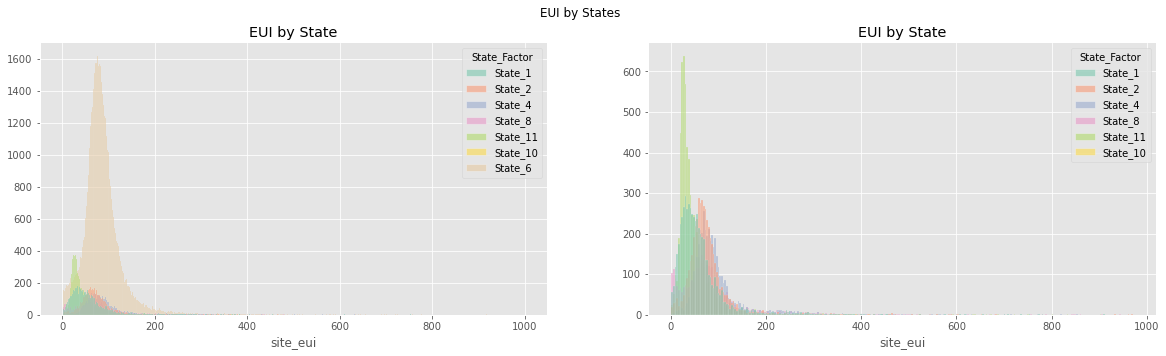

In [179]:
# State factor vs site eui

fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("EUI by States")

sns.histplot(df_comb, x='site_eui',hue='State_Factor', ax=ax[0])\
.set(title='EUI by State', ylabel=None)

sns.histplot(df_comb[df_comb['State_Factor']!='State_6'], x='site_eui',hue='State_Factor', ax=ax[1])\
.set(title='EUI by State', ylabel=None)





Inference:

State_6 and State_11 have higher site_eui

[Text(0.5, 1.0, 'EUI by State'), Text(0, 0.5, '')]

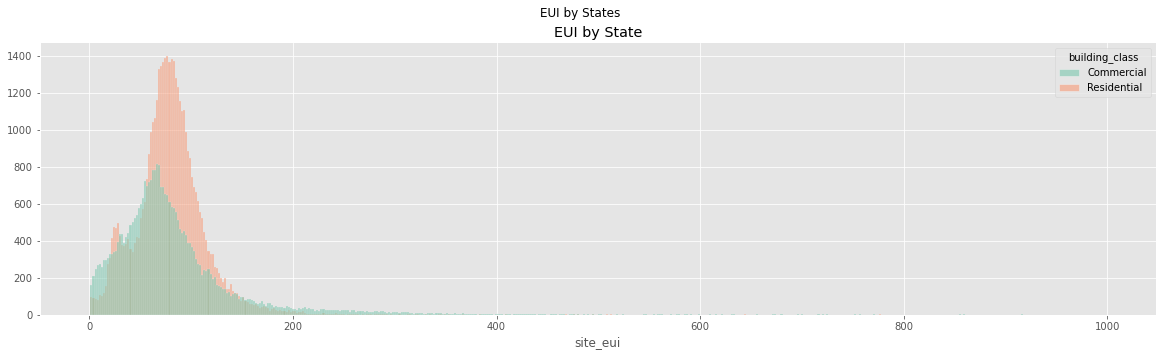

In [180]:
# Building_class vs site eui

fig, ax = plt.subplots(figsize=(20,5))
fig.suptitle("EUI by States")

sns.histplot(df_comb, x='site_eui',hue='building_class')\
.set(title='EUI by State', ylabel=None)

# sns.histplot(df_comb[df_comb['State_Factor']!='State_6'], x='site_eui',hue='State_Factor', ax=ax[1])\
# .set(title='EUI by State', ylabel=None)




Inference:
Residential buildings have higher site_eui compared to commercial buildings.

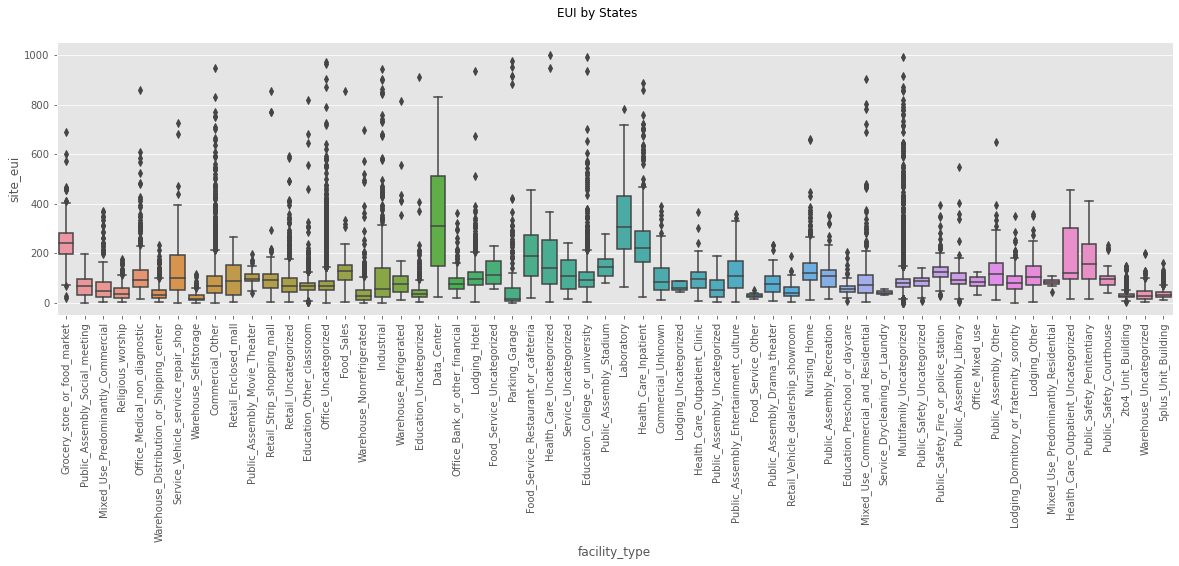

In [181]:
# Site EUI vs facility type

fig, ax = plt.subplots(figsize=(20,5))
fig.suptitle("EUI by States")

sns.boxplot(x=df_comb['facility_type'],y=df_comb['site_eui'])\
.set_xticklabels(ax.get_xticklabels(), rotation=90);

Inference:

Data_centres, LAboratories, Health_Care_Outpatient_Uncategorized, Food services restaurants,Publica Safety Penitentiary have higher site euis.

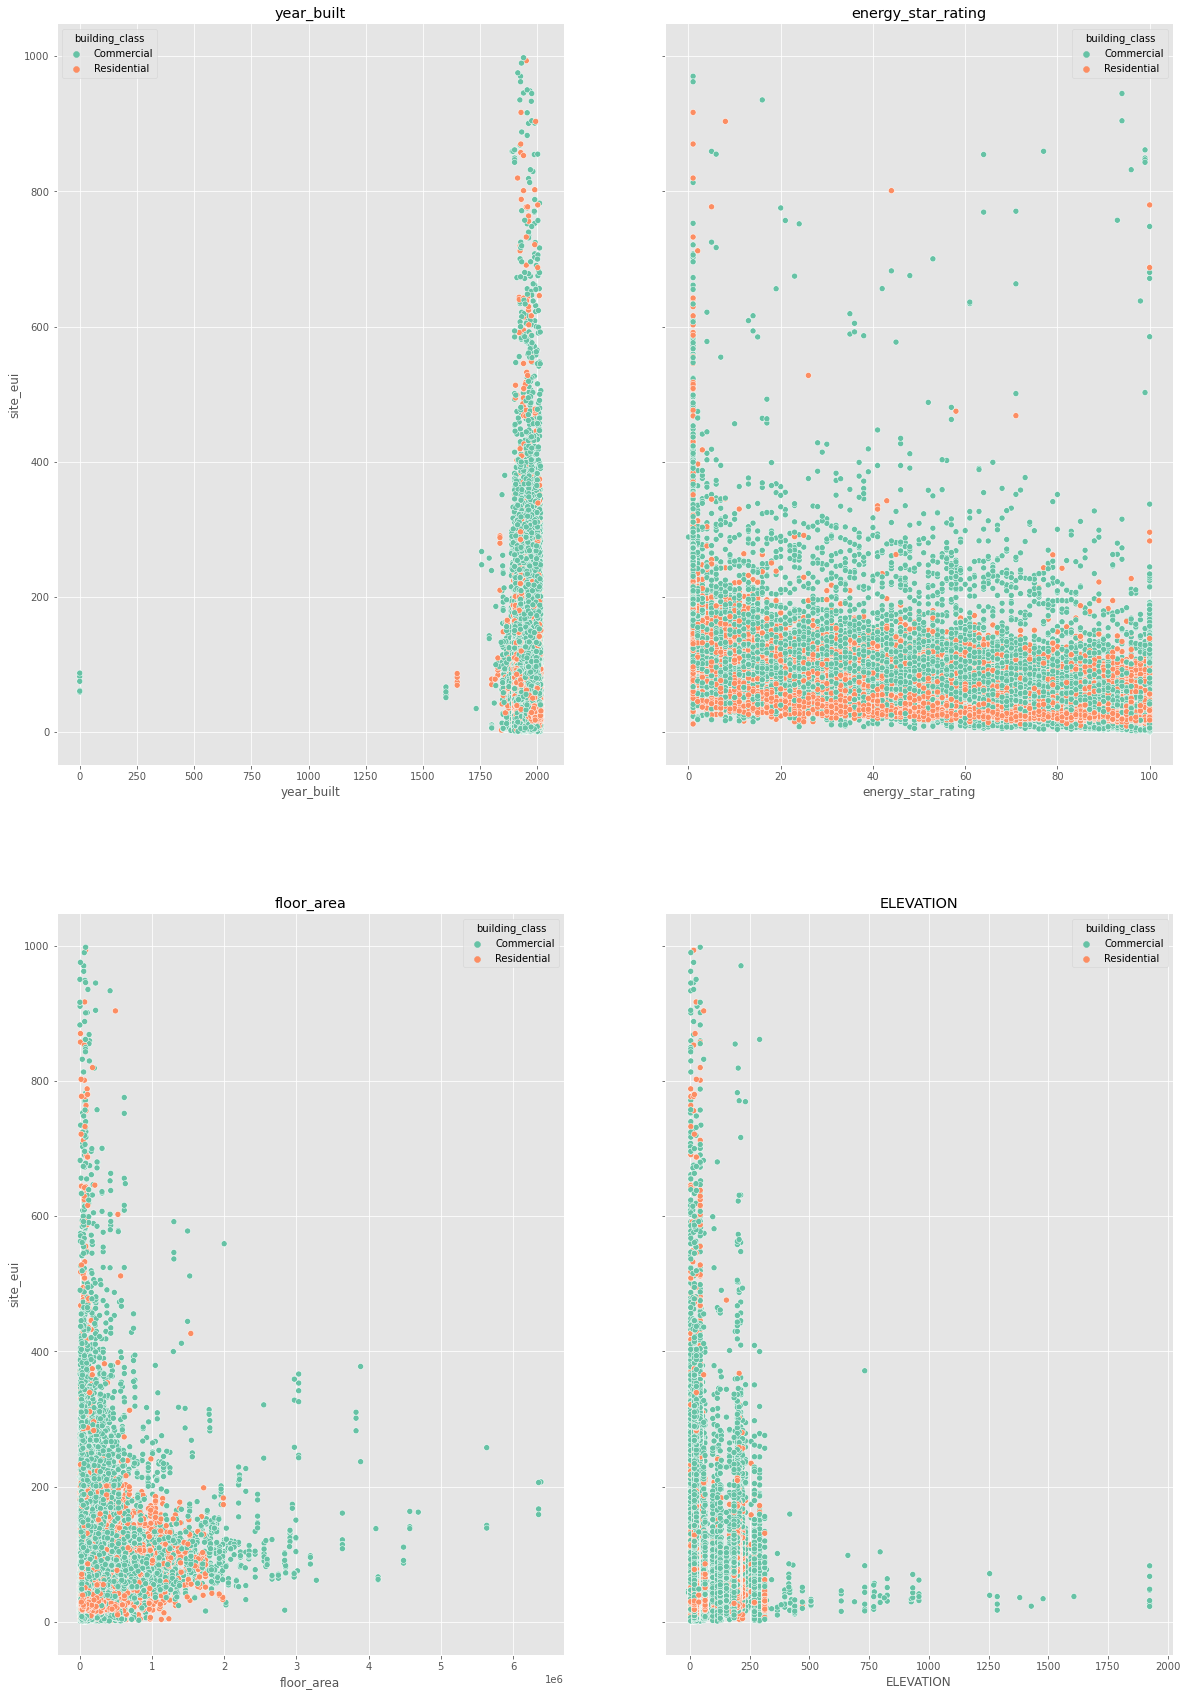

In [182]:
##Other Factors:

cols = ['year_built','energy_star_rating','floor_area','ELEVATION']

fig, ax = plt.subplots(2,2,figsize=(20,30),sharey = True)

for e,c in enumerate(cols):
    if e<=1:
        sns.scatterplot(data = df_comb, x=c, y='site_eui',ax=ax[0,e],hue='building_class')\
        .set(title=c)
    else:
        sns.scatterplot(data = df_comb, x=c, y='site_eui',ax=ax[1,e-2],hue='building_class')\
        .set(title=c)


        


Inference:

Recent buildings have higher EUI. As energy star rating increases EUI decreases. Higher floor area increases lower EUI. Also lower elevation has higher EUI?

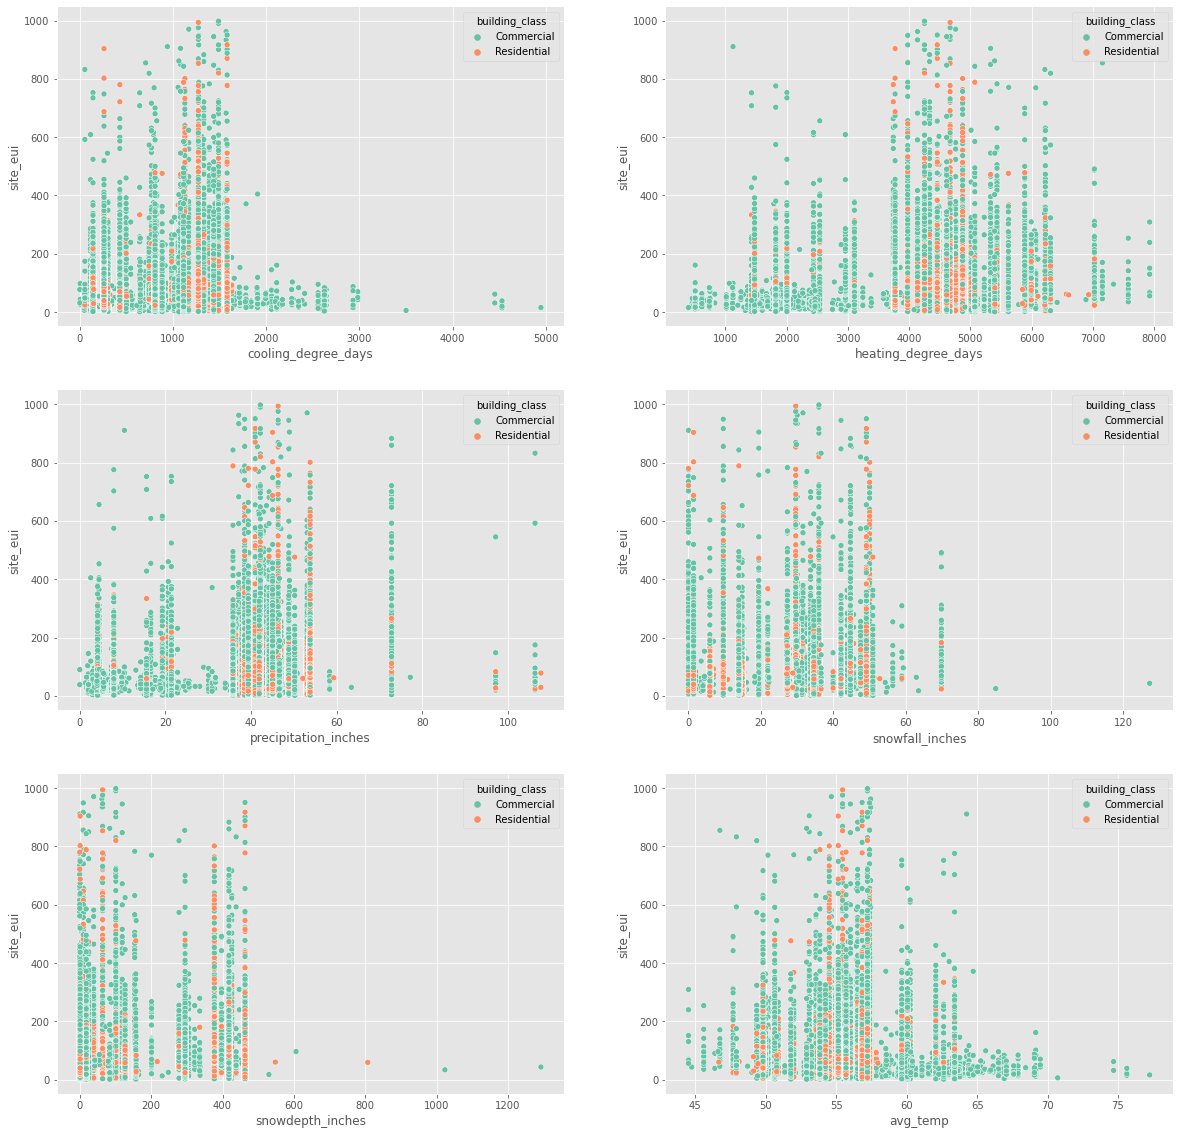

In [183]:
fig = plt.figure(figsize=(20,20))
cols = ['cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp',]

k=1

for col in cols:
    ax=fig.add_subplot(3,2,k)
    sns.scatterplot(data=df_comb,x=col,y='site_eui',hue='building_class')
    k+=1

### Conclusion from data

1. Test set has only year factor as 7 and train set doesnot have 7.

2. Test set has no records with state factor 6 & 10.

3. State 6 has most buildings in test set.

4. Zeros and NaN in year_built


## Preprocessing

In [184]:
# Clubbing the rows with similar data - we assume that rows with similar values in the below columns will be duplicates.

cols = ['State_Factor','building_class','facility_type','floor_area','year_built','Year_Factor','ELEVATION','energy_star_rating']

print(df_comb.shape)

df_comb = df_comb.sort_values(by=cols).reset_index(drop=True)

print(df_comb.shape)

(85462, 65)
(85462, 65)


#### Encoding - one hot encoding and target encoding

In [185]:
# df_comb.head()

df_comb.select_dtypes(include='object').columns

Index(['State_Factor', 'building_class', 'facility_type', 'key'], dtype='object')

In [186]:
## Encode the categorical features

#Columns with high cardinality can be encoded with target encoder
cats = ['State_Factor', 'facility_type']
target = 'site_eui'
for col in cats:
    encoder = TargetEncoder()
    df_comb[f'te_{col}'] = encoder.fit_transform(df_comb[col], df_comb[target])
    

/opt/anaconda3/lib/python3.8/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/opt/anaconda3/lib/python3.8/site-packages/category_encoders/target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/opt/anaconda3/lib/python3.8/site-packages/category_encoders/target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/opt/anaconda3/lib/python3.8/site-packages/category_encoders/target_enco

In [187]:
# df_comb.head()

In [188]:
# Encoding building_class with one hot encoder

# cats = ['State_Factor', 'facility_type', 'building_class']

dummies = pd.get_dummies(df_comb['building_class'], dummy_na=False)
for ohe_col in dummies:
    df_comb[f'ohe_{col}_{ohe_col}'] = dummies[ohe_col]

In [189]:
df_comb.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id,site_eui,key,te_State_Factor,te_facility_type,ohe_facility_type_Commercial,ohe_facility_type_Residential
0,3,State_1,Commercial,Commercial_Other,10149.0,1931.0,NaN,45.7,26,44.516129,64,30,49.392857,69,37,55.967742,77,40,61.783333,90,45,65.129032,91,52,70.016667,104,52,71.387097,102,54,71.322581,97,47,69.133333,98,43,61.000000,84,36,55.116667,77,24,45.387097,68,826,2542,4.50,0.0,0,60.056164,20,0,0,0,111,31,5,0,NaN,NaN,NaN,NaN,1456,6.800000,train,62.196194,92.642037,1,0
1,4,State_1,Commercial,Commercial_Other,10149.0,1931.0,NaN,120.4,41,55.096774,73,42,54.875000,71,47,59.032258,76,47,60.100000,90,51,63.483871,92,52,64.250000,87,53,66.903226,90,57,67.016129,80,56,68.383333,83,55,68.661290,95,46,59.650000,76,41,56.790323,68,497,1477,20.69,0.0,0,62.067123,0,0,0,0,27,6,0,0,NaN,NaN,NaN,NaN,2673,8.200000,train,62.196194,92.642037,1,0
2,5,State_1,Commercial,Commercial_Other,10149.0,1931.0,NaN,59.1,29,51.387097,77,36,56.803571,75,40,61.435484,85,41,60.966667,91,45,62.887097,90,55,72.983333,106,60,74.516129,103,58,74.774194,104,53,73.583333,105,49,69.580645,96,29,52.866667,75,28,48.580645,68,1319,1823,7.95,0.0,0,63.398630,4,0,0,0,136,52,10,0,NaN,NaN,NaN,NaN,3769,12.300000,train,62.196194,92.642037,1,0
3,7,State_1,Commercial,Commercial_Other,10149.0,1931.0,NaN,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,76077,NaN,test,62.196194,92.642037,1,0
4,3,State_1,Commercial,Commercial_Other,10755.0,1937.0,NaN,9.1,22,44.790323,65,25,47.892857,71,32,53.112903,79,34,58.866667,87,35,62.096774,91,44,66.283333,99,48,65.693548,91,45,67.080645,92,42,65.950000,96,35,56.967742,85,31,52.516667,76,16,43.338710,68,303,3108,4.16,0.0,0,57.082192,33,2,0,0,72,10,0,0,NaN,NaN,NaN,NaN,2144,63.083288,train,62.196194,92.642037,1,0


#### Null handling - KNN imputation

In [190]:
## Null imputation using KNN

# This takes 1 hr, hence, unpickle the df1 and carry on with knn_imputing = False
knn_imputing = False
target='site_eui'

if knn_imputing:
    imputer = KNNImputer(n_neighbors=7)
    tmp = df_comb[['State_Factor', 'building_class', 'facility_type', 'key', target]]
    df = df_comb.drop(tmp.columns, axis=1)
    df1 = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
    
    tmp.to_csv('data/imputer_tmp.csv', index=False)
    df1.to_csv('data/imputer_df1.csv', index=False)
    joblib.dump(imputer, 'models/knn_imputer.pkl')

else:
    df1 = pd.read_csv('data/imputer_df1.csv')
    tmp = df_comb[['State_Factor', 'building_class', 'facility_type', 'key', target]]
    df_comb = df_comb.drop(tmp.columns, axis=1)
    
for col in tmp.columns:
    df_comb[col]=tmp[col]
for col in df1.columns:
    df_comb[col] = df1[col]

In [209]:
print(df1.shape)
df1.isnull().sum()[df1.isnull().sum()!=0]

(85462, 63)


ELEVATION    2
dtype: int64

In [210]:
df_comb.shape

(85462, 69)

In [211]:
df_comb.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id,te_State_Factor,te_facility_type,ohe_facility_type_Commercial,ohe_facility_type_Residential,State_Factor,building_class,facility_type,key,site_eui
0,3.0,100.742245,43.943145,38.428571,6.760178,26.0,44.516129,64.0,30.0,49.392857,69.0,37.0,55.967742,77.0,40.0,61.783333,90.0,45.0,65.129032,91.0,52.0,70.016667,104.0,52.0,71.387097,102.0,54.0,71.322581,97.0,47.0,69.133333,98.0,43.0,61.000000,84.0,36.0,55.116667,77.0,24.0,45.387097,68.0,826.0,2542.0,4.50,0.0,0.0,60.056164,20.0,0.0,0.0,0.0,111.0,31.0,2.236068,0.0,79.285714,86.428571,4.928571,122.000000,1456.0,62.196194,92.642037,1.0,0.0,State_1,Commercial,Commercial_Other,train,6.800000
1,4.0,100.742245,43.943145,43.571429,10.972693,41.0,55.096774,73.0,42.0,54.875000,71.0,47.0,59.032258,76.0,47.0,60.100000,90.0,51.0,63.483871,92.0,52.0,64.250000,87.0,53.0,66.903226,90.0,57.0,67.016129,80.0,56.0,68.383333,83.0,55.0,68.661290,95.0,46.0,59.650000,76.0,41.0,56.790323,68.0,497.0,1477.0,20.69,0.0,0.0,62.067123,0.0,0.0,0.0,0.0,27.0,6.0,0.000000,0.0,79.285714,86.428571,4.928571,122.000000,2673.0,62.196194,92.642037,1.0,0.0,State_1,Commercial,Commercial_Other,train,8.200000
2,5.0,100.742245,43.943145,37.571429,7.687652,29.0,51.387097,77.0,36.0,56.803571,75.0,40.0,61.435484,85.0,41.0,60.966667,91.0,45.0,62.887097,90.0,55.0,72.983333,106.0,60.0,74.516129,103.0,58.0,74.774194,104.0,53.0,73.583333,105.0,49.0,69.580645,96.0,29.0,52.866667,75.0,28.0,48.580645,68.0,1319.0,1823.0,7.95,0.0,0.0,63.398630,4.0,0.0,0.0,0.0,136.0,52.0,3.162278,0.0,119.142857,133.428571,7.214286,121.000000,3769.0,62.196194,92.642037,1.0,0.0,State_1,Commercial,Commercial_Other,train,12.300000
3,7.0,100.742245,43.943145,60.285714,7.687652,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.450000,78.0,49.0,60.903226,87.0,51.0,63.150000,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.050000,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.414214,0.0,194.714286,189.000000,13.457143,138.285714,76077.0,62.196194,92.642037,1.0,0.0,State_1,Commercial,Commercial_Other,test,NaN
4,3.0,103.706316,44.011362,45.571429,3.016621,22.0,44.790323,65.0,25.0,47.892857,71.0,32.0,53.112903,79.0,34.0,58.866667,87.0,35.0,62.096774,91.0,44.0,66.283333,99.0,48.0,65.693548,91.0,45.0,67.080645,92.0,42.0,65.950000,96.0,35.0,56.967742,85.0,31.0,52.516667,76.0,16.0,43.338710,68.0,303.0,3108.0,4.16,0.0,0.0,57.082192,33.0,2.0,0.0,0.0,72.0,10.0,0.000000,0.0,79.285714,86.428571,4.928571,112.714286,2144.0,62.196194,92.642037,1.0,0.0,State_1,Commercial,Commercial_Other,train,63.083288


#### check for skewness

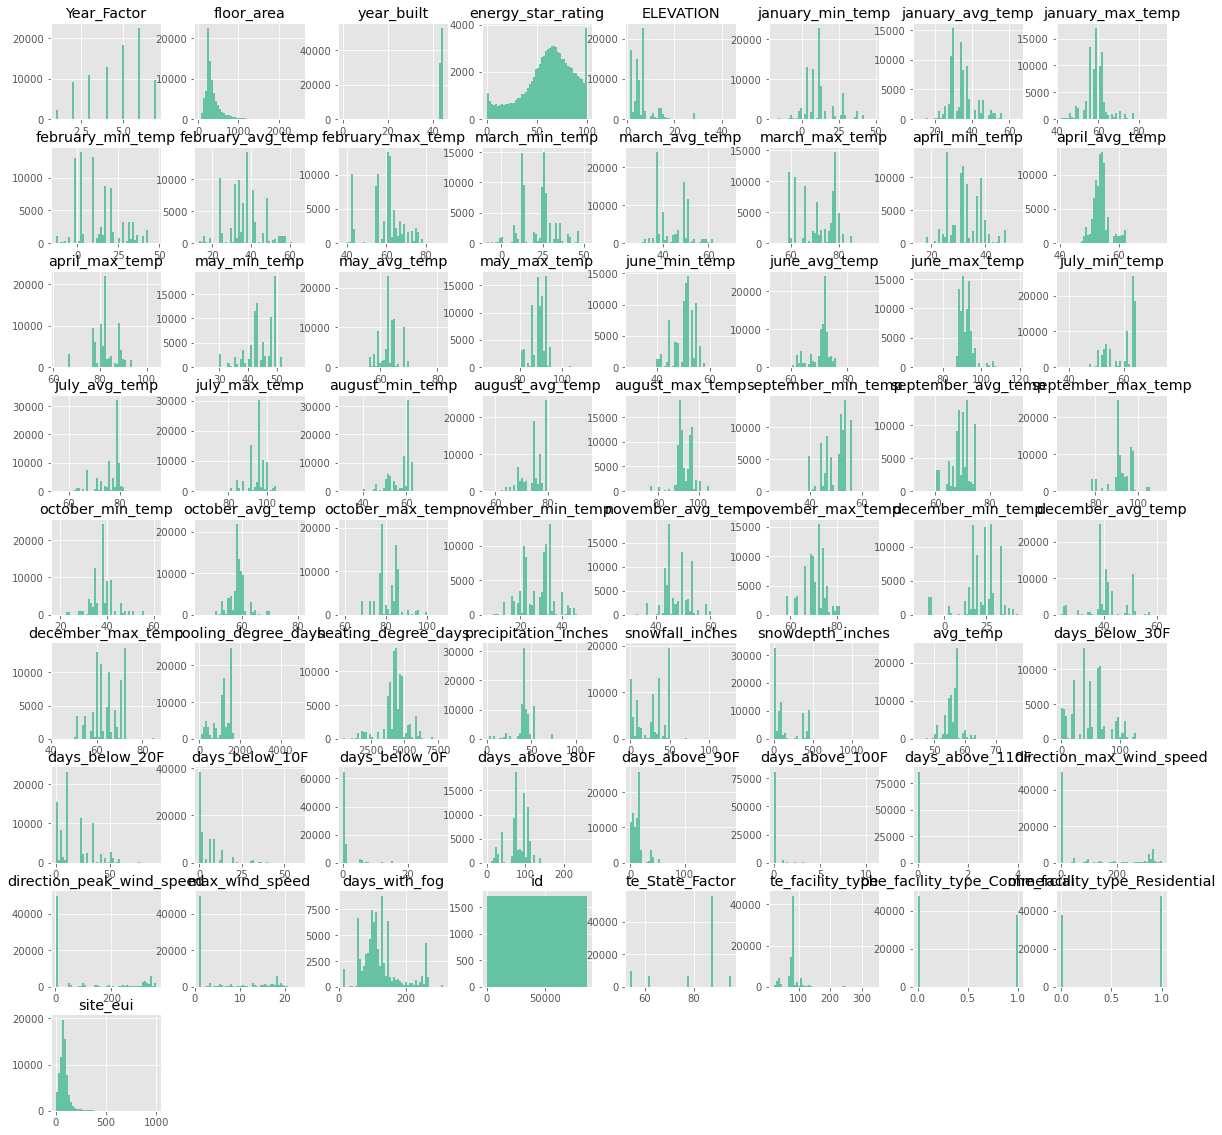

In [212]:
nums = df_comb.loc[:, df_comb.dtypes != 'object'].columns
df_comb[nums].hist(bins=50, figsize=(20,20))
plt.show();

In [213]:
skw=df_comb[nums].skew().sort_values(key=abs, ascending=False)[:5]
skw

days_above_110F    56.877429
year_built        -42.612706
days_above_100F     6.554587
site_eui            4.739972
days_below_0F       4.541444
dtype: float64

In [214]:
skw.index#)#snowdepth_inches,days_below_10F,days_below_0F
cols=list(skw.index)
cols

['days_above_110F',
 'year_built',
 'days_above_100F',
 'site_eui',
 'days_below_0F']

41.70830853182816


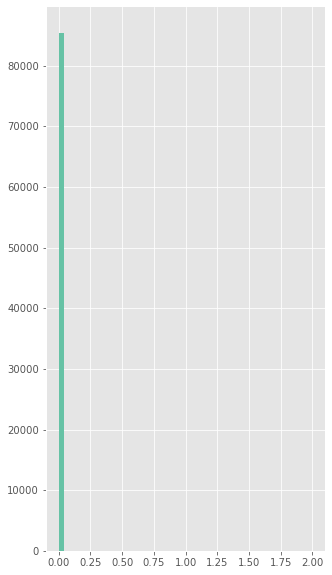

-81.61929583310177


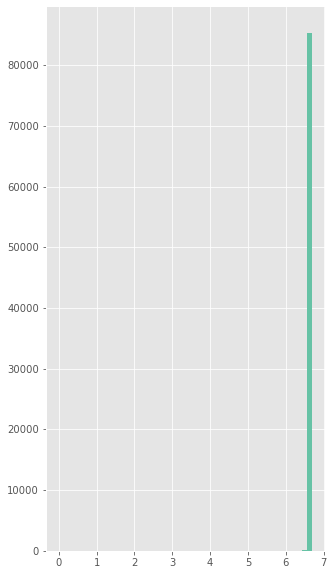

4.311842263268209


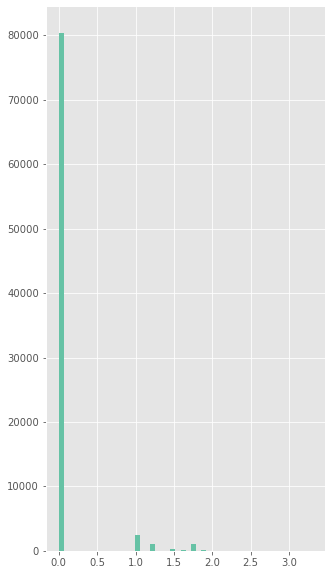

1.1865575054849389


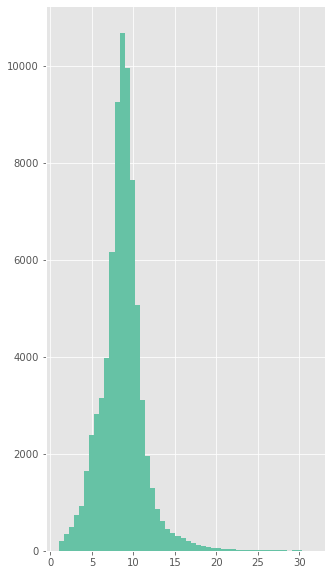

2.5031311598429


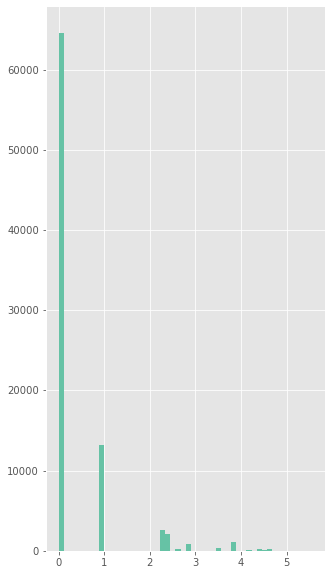

In [215]:
#applying sqrt transform to reduce the skewness.
for col in cols:
    df_comb[col]=np.sqrt(df_comb[col])
    print(df_comb[col].skew())
    df_comb[col].hist(bins=50, figsize=(5,10))
    plt.show()

#### saving feature dataset

In [216]:
saved = False
if saved:
    !pip install pickle5 --quiet
    import pickle5 as pickle
    data_path = 'data/feature_transformed_set.pkl'
    with open(data_path, "rb") as fh:
        df1 = pickle.load(fh)
else:
    df_comb.to_pickle('data/feature_transformed_set.pkl')

In [217]:
df_comb.shape

(85462, 69)

In [218]:
df_comb.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id,te_State_Factor,te_facility_type,ohe_facility_type_Commercial,ohe_facility_type_Residential,State_Factor,building_class,facility_type,key,site_eui
0,3.0,100.742245,6.628963,38.428571,6.760178,26.0,44.516129,64.0,30.0,49.392857,69.0,37.0,55.967742,77.0,40.0,61.783333,90.0,45.0,65.129032,91.0,52.0,70.016667,104.0,52.0,71.387097,102.0,54.0,71.322581,97.0,47.0,69.133333,98.0,43.0,61.000000,84.0,36.0,55.116667,77.0,24.0,45.387097,68.0,826.0,2542.0,4.50,0.0,0.0,60.056164,20.0,0.0,0.0,0.0,111.0,31.0,1.495349,0.0,79.285714,86.428571,4.928571,122.000000,1456.0,62.196194,92.642037,1.0,0.0,State_1,Commercial,Commercial_Other,train,2.607681
1,4.0,100.742245,6.628963,43.571429,10.972693,41.0,55.096774,73.0,42.0,54.875000,71.0,47.0,59.032258,76.0,47.0,60.100000,90.0,51.0,63.483871,92.0,52.0,64.250000,87.0,53.0,66.903226,90.0,57.0,67.016129,80.0,56.0,68.383333,83.0,55.0,68.661290,95.0,46.0,59.650000,76.0,41.0,56.790323,68.0,497.0,1477.0,20.69,0.0,0.0,62.067123,0.0,0.0,0.0,0.0,27.0,6.0,0.000000,0.0,79.285714,86.428571,4.928571,122.000000,2673.0,62.196194,92.642037,1.0,0.0,State_1,Commercial,Commercial_Other,train,2.863564
2,5.0,100.742245,6.628963,37.571429,7.687652,29.0,51.387097,77.0,36.0,56.803571,75.0,40.0,61.435484,85.0,41.0,60.966667,91.0,45.0,62.887097,90.0,55.0,72.983333,106.0,60.0,74.516129,103.0,58.0,74.774194,104.0,53.0,73.583333,105.0,49.0,69.580645,96.0,29.0,52.866667,75.0,28.0,48.580645,68.0,1319.0,1823.0,7.95,0.0,0.0,63.398630,4.0,0.0,0.0,0.0,136.0,52.0,1.778279,0.0,119.142857,133.428571,7.214286,121.000000,3769.0,62.196194,92.642037,1.0,0.0,State_1,Commercial,Commercial_Other,train,3.507136
3,7.0,100.742245,6.628963,60.285714,7.687652,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.450000,78.0,49.0,60.903226,87.0,51.0,63.150000,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.050000,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.189207,0.0,194.714286,189.000000,13.457143,138.285714,76077.0,62.196194,92.642037,1.0,0.0,State_1,Commercial,Commercial_Other,test,NaN
4,3.0,103.706316,6.634106,45.571429,3.016621,22.0,44.790323,65.0,25.0,47.892857,71.0,32.0,53.112903,79.0,34.0,58.866667,87.0,35.0,62.096774,91.0,44.0,66.283333,99.0,48.0,65.693548,91.0,45.0,67.080645,92.0,42.0,65.950000,96.0,35.0,56.967742,85.0,31.0,52.516667,76.0,16.0,43.338710,68.0,303.0,3108.0,4.16,0.0,0.0,57.082192,33.0,2.0,0.0,0.0,72.0,10.0,0.000000,0.0,79.285714,86.428571,4.928571,112.714286,2144.0,62.196194,92.642037,1.0,0.0,State_1,Commercial,Commercial_Other,train,7.942499


#### Creating train and test sets for training and testing the model

In [222]:
# Drop the id column as it doesnot have any influence on site eui. Aslo drop categorical cols
df_comb.drop(['id','State_Factor','building_class','facility_type'],axis=1,inplace=True)

In [223]:
df_comb.shape

(85462, 65)

In [224]:
df_comb.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,te_State_Factor,te_facility_type,ohe_facility_type_Commercial,ohe_facility_type_Residential,key,site_eui
0,3.0,100.742245,6.628963,38.428571,6.760178,26.0,44.516129,64.0,30.0,49.392857,69.0,37.0,55.967742,77.0,40.0,61.783333,90.0,45.0,65.129032,91.0,52.0,70.016667,104.0,52.0,71.387097,102.0,54.0,71.322581,97.0,47.0,69.133333,98.0,43.0,61.000000,84.0,36.0,55.116667,77.0,24.0,45.387097,68.0,826.0,2542.0,4.50,0.0,0.0,60.056164,20.0,0.0,0.0,0.0,111.0,31.0,1.495349,0.0,79.285714,86.428571,4.928571,122.000000,62.196194,92.642037,1.0,0.0,train,2.607681
1,4.0,100.742245,6.628963,43.571429,10.972693,41.0,55.096774,73.0,42.0,54.875000,71.0,47.0,59.032258,76.0,47.0,60.100000,90.0,51.0,63.483871,92.0,52.0,64.250000,87.0,53.0,66.903226,90.0,57.0,67.016129,80.0,56.0,68.383333,83.0,55.0,68.661290,95.0,46.0,59.650000,76.0,41.0,56.790323,68.0,497.0,1477.0,20.69,0.0,0.0,62.067123,0.0,0.0,0.0,0.0,27.0,6.0,0.000000,0.0,79.285714,86.428571,4.928571,122.000000,62.196194,92.642037,1.0,0.0,train,2.863564
2,5.0,100.742245,6.628963,37.571429,7.687652,29.0,51.387097,77.0,36.0,56.803571,75.0,40.0,61.435484,85.0,41.0,60.966667,91.0,45.0,62.887097,90.0,55.0,72.983333,106.0,60.0,74.516129,103.0,58.0,74.774194,104.0,53.0,73.583333,105.0,49.0,69.580645,96.0,29.0,52.866667,75.0,28.0,48.580645,68.0,1319.0,1823.0,7.95,0.0,0.0,63.398630,4.0,0.0,0.0,0.0,136.0,52.0,1.778279,0.0,119.142857,133.428571,7.214286,121.000000,62.196194,92.642037,1.0,0.0,train,3.507136
3,7.0,100.742245,6.628963,60.285714,7.687652,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.450000,78.0,49.0,60.903226,87.0,51.0,63.150000,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.050000,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.189207,0.0,194.714286,189.000000,13.457143,138.285714,62.196194,92.642037,1.0,0.0,test,NaN
4,3.0,103.706316,6.634106,45.571429,3.016621,22.0,44.790323,65.0,25.0,47.892857,71.0,32.0,53.112903,79.0,34.0,58.866667,87.0,35.0,62.096774,91.0,44.0,66.283333,99.0,48.0,65.693548,91.0,45.0,67.080645,92.0,42.0,65.950000,96.0,35.0,56.967742,85.0,31.0,52.516667,76.0,16.0,43.338710,68.0,303.0,3108.0,4.16,0.0,0.0,57.082192,33.0,2.0,0.0,0.0,72.0,10.0,0.000000,0.0,79.285714,86.428571,4.928571,112.714286,62.196194,92.642037,1.0,0.0,train,7.942499


In [242]:
test = df_comb[df_comb['key']=='test']
print(test.shape)
test.head()

(9705, 65)


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,te_State_Factor,te_facility_type,ohe_facility_type_Commercial,ohe_facility_type_Residential,key,site_eui
3,7.0,100.742245,6.628963,60.285714,7.687652,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.189207,0.0,194.714286,189.000000,13.457143,138.285714,62.196194,92.642037,1.0,0.0,test,NaN
8,7.0,103.706316,6.634106,66.714286,4.312772,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.189207,0.0,194.714286,189.000000,13.457143,151.428571,62.196194,92.642037,1.0,0.0,test,NaN
16,7.0,108.305125,6.634106,54.714286,1.549193,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.189207,0.0,274.428571,265.857143,17.885714,117.428571,62.196194,92.642037,1.0,0.0,test,NaN
19,7.0,114.017543,6.641799,58.428571,7.687652,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.189207,0.0,234.571429,227.428571,15.671429,151.428571,62.196194,92.642037,1.0,0.0,test,NaN
21,7.0,114.891253,6.608268,55.000000,6.625708,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.189207,0.0,234.571429,227.428571,15.671429,151.428571,62.196194,92.642037,1.0,0.0,test,NaN


In [243]:
train = df_comb[df_comb['key']=='train']
print(train.shape)
train.head()

(75757, 65)


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,te_State_Factor,te_facility_type,ohe_facility_type_Commercial,ohe_facility_type_Residential,key,site_eui
0,3.0,100.742245,6.628963,38.428571,6.760178,26.0,44.516129,64.0,30.0,49.392857,69.0,37.0,55.967742,77.0,40.0,61.783333,90.0,45.0,65.129032,91.0,52.0,70.016667,104.0,52.0,71.387097,102.0,54.0,71.322581,97.0,47.0,69.133333,98.0,43.0,61.000000,84.0,36.0,55.116667,77.0,24.0,45.387097,68.0,826.0,2542.0,4.50,0.0,0.0,60.056164,20.0,0.0,0.0,0.0,111.0,31.0,1.495349,0.0,79.285714,86.428571,4.928571,122.000000,62.196194,92.642037,1.0,0.0,train,2.607681
1,4.0,100.742245,6.628963,43.571429,10.972693,41.0,55.096774,73.0,42.0,54.875000,71.0,47.0,59.032258,76.0,47.0,60.100000,90.0,51.0,63.483871,92.0,52.0,64.250000,87.0,53.0,66.903226,90.0,57.0,67.016129,80.0,56.0,68.383333,83.0,55.0,68.661290,95.0,46.0,59.650000,76.0,41.0,56.790323,68.0,497.0,1477.0,20.69,0.0,0.0,62.067123,0.0,0.0,0.0,0.0,27.0,6.0,0.000000,0.0,79.285714,86.428571,4.928571,122.000000,62.196194,92.642037,1.0,0.0,train,2.863564
2,5.0,100.742245,6.628963,37.571429,7.687652,29.0,51.387097,77.0,36.0,56.803571,75.0,40.0,61.435484,85.0,41.0,60.966667,91.0,45.0,62.887097,90.0,55.0,72.983333,106.0,60.0,74.516129,103.0,58.0,74.774194,104.0,53.0,73.583333,105.0,49.0,69.580645,96.0,29.0,52.866667,75.0,28.0,48.580645,68.0,1319.0,1823.0,7.95,0.0,0.0,63.398630,4.0,0.0,0.0,0.0,136.0,52.0,1.778279,0.0,119.142857,133.428571,7.214286,121.000000,62.196194,92.642037,1.0,0.0,train,3.507136
4,3.0,103.706316,6.634106,45.571429,3.016621,22.0,44.790323,65.0,25.0,47.892857,71.0,32.0,53.112903,79.0,34.0,58.866667,87.0,35.0,62.096774,91.0,44.0,66.283333,99.0,48.0,65.693548,91.0,45.0,67.080645,92.0,42.0,65.950000,96.0,35.0,56.967742,85.0,31.0,52.516667,76.0,16.0,43.338710,68.0,303.0,3108.0,4.16,0.0,0.0,57.082192,33.0,2.0,0.0,0.0,72.0,10.0,0.000000,0.0,79.285714,86.428571,4.928571,112.714286,62.196194,92.642037,1.0,0.0,train,7.942499
5,4.0,103.706316,6.634106,50.428571,3.016621,41.0,55.096774,73.0,42.0,54.875000,71.0,47.0,59.032258,76.0,47.0,60.100000,90.0,51.0,63.483871,92.0,52.0,64.250000,87.0,53.0,66.903226,90.0,57.0,67.016129,80.0,56.0,68.383333,83.0,55.0,68.661290,95.0,46.0,59.650000,76.0,41.0,56.790323,68.0,497.0,1477.0,20.69,0.0,0.0,62.067123,0.0,0.0,0.0,0.0,27.0,6.0,0.000000,0.0,119.142857,133.428571,7.214286,112.714286,62.196194,92.642037,1.0,0.0,train,7.549326


In [245]:
test=test.reset_index(drop=True)
train=train.reset_index(drop=True)

In [246]:
#Create X_train,y_train



y_train = train['site_eui'] #y_train

X_train = train.drop(['key', 'site_eui'], axis=1) #X_train
X_test  = test.drop(['key', 'site_eui'], axis=1) #X_test

In [247]:
y_train

0        2.607681
1        2.863564
2        3.507136
3        7.942499
4        7.549326
           ...   
75752    6.788378
75753    7.615090
75754    4.228635
75755    6.597962
75756    7.693919
Name: site_eui, Length: 75757, dtype: float64

In [249]:
X_train.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,te_State_Factor,te_facility_type,ohe_facility_type_Commercial,ohe_facility_type_Residential
0,3.0,100.742245,6.628963,38.428571,6.760178,26.0,44.516129,64.0,30.0,49.392857,69.0,37.0,55.967742,77.0,40.0,61.783333,90.0,45.0,65.129032,91.0,52.0,70.016667,104.0,52.0,71.387097,102.0,54.0,71.322581,97.0,47.0,69.133333,98.0,43.0,61.000000,84.0,36.0,55.116667,77.0,24.0,45.387097,68.0,826.0,2542.0,4.50,0.0,0.0,60.056164,20.0,0.0,0.0,0.0,111.0,31.0,1.495349,0.0,79.285714,86.428571,4.928571,122.000000,62.196194,92.642037,1.0,0.0
1,4.0,100.742245,6.628963,43.571429,10.972693,41.0,55.096774,73.0,42.0,54.875000,71.0,47.0,59.032258,76.0,47.0,60.100000,90.0,51.0,63.483871,92.0,52.0,64.250000,87.0,53.0,66.903226,90.0,57.0,67.016129,80.0,56.0,68.383333,83.0,55.0,68.661290,95.0,46.0,59.650000,76.0,41.0,56.790323,68.0,497.0,1477.0,20.69,0.0,0.0,62.067123,0.0,0.0,0.0,0.0,27.0,6.0,0.000000,0.0,79.285714,86.428571,4.928571,122.000000,62.196194,92.642037,1.0,0.0
2,5.0,100.742245,6.628963,37.571429,7.687652,29.0,51.387097,77.0,36.0,56.803571,75.0,40.0,61.435484,85.0,41.0,60.966667,91.0,45.0,62.887097,90.0,55.0,72.983333,106.0,60.0,74.516129,103.0,58.0,74.774194,104.0,53.0,73.583333,105.0,49.0,69.580645,96.0,29.0,52.866667,75.0,28.0,48.580645,68.0,1319.0,1823.0,7.95,0.0,0.0,63.398630,4.0,0.0,0.0,0.0,136.0,52.0,1.778279,0.0,119.142857,133.428571,7.214286,121.000000,62.196194,92.642037,1.0,0.0
3,3.0,103.706316,6.634106,45.571429,3.016621,22.0,44.790323,65.0,25.0,47.892857,71.0,32.0,53.112903,79.0,34.0,58.866667,87.0,35.0,62.096774,91.0,44.0,66.283333,99.0,48.0,65.693548,91.0,45.0,67.080645,92.0,42.0,65.950000,96.0,35.0,56.967742,85.0,31.0,52.516667,76.0,16.0,43.338710,68.0,303.0,3108.0,4.16,0.0,0.0,57.082192,33.0,2.0,0.0,0.0,72.0,10.0,0.000000,0.0,79.285714,86.428571,4.928571,112.714286,62.196194,92.642037,1.0,0.0
4,4.0,103.706316,6.634106,50.428571,3.016621,41.0,55.096774,73.0,42.0,54.875000,71.0,47.0,59.032258,76.0,47.0,60.100000,90.0,51.0,63.483871,92.0,52.0,64.250000,87.0,53.0,66.903226,90.0,57.0,67.016129,80.0,56.0,68.383333,83.0,55.0,68.661290,95.0,46.0,59.650000,76.0,41.0,56.790323,68.0,497.0,1477.0,20.69,0.0,0.0,62.067123,0.0,0.0,0.0,0.0,27.0,6.0,0.000000,0.0,119.142857,133.428571,7.214286,112.714286,62.196194,92.642037,1.0,0.0


In [250]:
X_test.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,te_State_Factor,te_facility_type,ohe_facility_type_Commercial,ohe_facility_type_Residential
0,7.0,100.742245,6.628963,60.285714,7.687652,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.189207,0.0,194.714286,189.000000,13.457143,138.285714,62.196194,92.642037,1.0,0.0
1,7.0,103.706316,6.634106,66.714286,4.312772,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.189207,0.0,194.714286,189.000000,13.457143,151.428571,62.196194,92.642037,1.0,0.0
2,7.0,108.305125,6.634106,54.714286,1.549193,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.189207,0.0,274.428571,265.857143,17.885714,117.428571,62.196194,92.642037,1.0,0.0
3,7.0,114.017543,6.641799,58.428571,7.687652,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.189207,0.0,234.571429,227.428571,15.671429,151.428571,62.196194,92.642037,1.0,0.0
4,7.0,114.891253,6.608268,55.000000,6.625708,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,1.189207,0.0,234.571429,227.428571,15.671429,151.428571,62.196194,92.642037,1.0,0.0


In [254]:
test = pd.read_csv('y_test.csv')
test.head()
y_test = test['site_eui']

## Modelling

#### Linear regression

In [268]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

In [269]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

-5.680222848676726
[-2.09919597e-01  6.38154751e-04 -2.62842215e-01 -4.20210882e-02
 -7.76246273e-03 -3.86141869e-02  3.02537159e-01 -2.46973421e-02
 -9.55963289e-03  8.58051607e-02 -2.53666515e-02 -2.29956744e-02
  1.21727827e-01  1.36140862e-02  5.45617258e-02  2.26652788e-01
 -9.72837192e-02  2.81293208e-02 -3.67153135e-02  3.64591674e-02
 -8.12628594e-02  2.27985426e-01  6.26360234e-02  2.16580782e-02
  4.19545993e-02 -2.44568890e-02  1.51388881e-03  4.37410361e-01
 -7.76557451e-02 -2.58472943e-02  5.54660591e-02 -7.26034884e-03
 -5.14386445e-03  2.74886323e-01 -2.52878815e-02  4.29961104e-02
  1.44910668e-01 -5.47562944e-03 -3.33794566e-02  1.62899114e-01
  1.10824744e-02 -7.50991902e-04  4.55514398e-04  2.74743351e-02
 -1.30705948e-02  6.56724161e-04 -1.57116994e+00  8.05000260e-03
 -3.99099231e-03 -2.31273677e-02  1.52523197e-01  1.39041440e-02
 -5.66437116e-03 -6.67323740e-02 -4.62977984e-01  1.34087826e-03
 -9.24654531e-04 -1.39073106e-02  4.66963590e-04  1.15908274e-02
  4.10

In [270]:
y_pred = lr.predict(X_test)

In [271]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [272]:
r_squared = r2_score(y_test, y_pred)

In [273]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7595.359613142166
r_square_value : -1.1006739643937173


##### Inference : the performance is very poor with linear regression

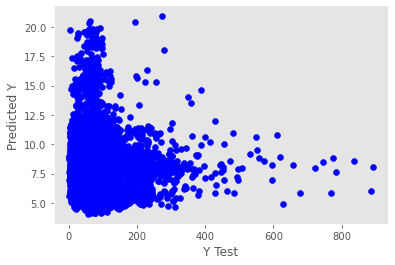

In [274]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

#### Random forest

In [278]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(random_state=1, criterion='mse', max_depth = 15, min_samples_split= 2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [280]:

# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 87.35585204260153
 MAE: 63.30319970935746
 MSE: 7631.04488608889
 R2: -1.110543559463549


In [ ]:
# this mse =87.3 means that this model is not able to match the 87.3 percent of the values
# r2 means that your model is -1.11% is accurate on test data .
#Looks like the model is overfitting


In [260]:
# train.dropna(inplace=True)
# train.isnull().sum()[train.isnull().sum()!=0]

Series([], dtype: int64)

In [262]:
# train=train.reset_index(drop=True)

In [265]:
# train.head()
# X_train = train.drop(['key', 'site_eui'], axis=1) #X_train



In [267]:
# y_train = train['site_eui'] #y_train



In [263]:
# X_train = train.drop(['key', 'site_eui'], axis=1) #X_train
# X_test  = test.drop(['key', 'site_eui'], axis=1) #X_test

KeyError: "['key'] not found in axis"